In [1]:
# uncomment this block if running from colab and 
#put the path where the code is placed (model.py, utils.py)
#%cd "/content/drive/MyDrive/ML_assignment/ERA_V1/S5_Assignment/codes"

/content/drive/MyDrive/ML_assignment/ERA_V1/S5_Assignment/codes


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from model import Net, train, test
from utils import data_transforms, plot_data, plot_loss_accuracy

In [3]:
"""CODE BLOCK: 2"""

# if cuda is availble, us gpu faster training
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
print("CUDA Available?", cuda, device)

CUDA Available? True cuda


In [4]:
"""CODE BLOCK: 4"""

train_transforms, test_transforms = data_transforms()
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [5]:
"""CODE BLOCK: 5"""

batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

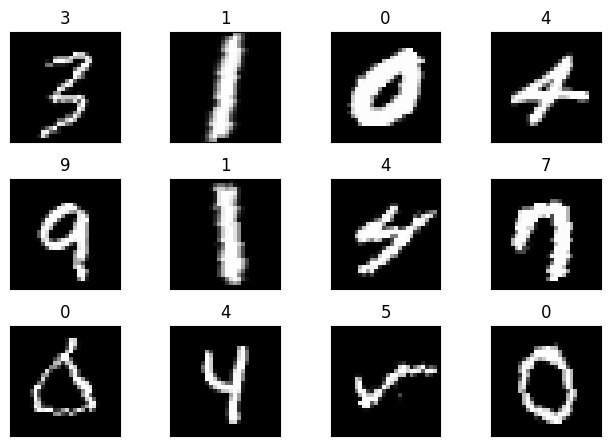

In [6]:
"""CODE BLOCK: 6"""

batch_data, batch_label = next(iter(train_loader)) 
plot_data(batch_data, batch_label, 12, 3, 4)

In [7]:
"""CODE BLOCK: 8"""

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [8]:
"""CODE BLOCK: 10"""

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss(reduction='sum')
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_accuracy, train_loss = train(model, device, train_loader, optimizer, criterion)
  train_acc.append(train_accuracy)
  train_losses.append(train_loss)
  test_accuracy, test_loss = test(model, device, test_loader, criterion)
  test_acc.append(test_accuracy)
  test_losses.append(test_loss)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.5502 Batch_id=117 Accuracy=38.78:   0%|          | 0/118 [00:30<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8437/10000 (84.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0675 Batch_id=117 Accuracy=92.39:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0002, Accuracy: 9690/10000 (96.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0741 Batch_id=117 Accuracy=96.03:   0%|          | 0/118 [00:22<?, ?it/s]


Test set: Average loss: 0.0002, Accuracy: 9806/10000 (98.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2588 Batch_id=117 Accuracy=96.95:   0%|          | 0/118 [00:21<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9853/10000 (98.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0589 Batch_id=117 Accuracy=97.47:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0903 Batch_id=117 Accuracy=97.71:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9869/10000 (98.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0553 Batch_id=117 Accuracy=97.94:   0%|          | 0/118 [00:22<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9876/10000 (98.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0440 Batch_id=117 Accuracy=98.19:   0%|          | 0/118 [00:21<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9890/10000 (98.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0893 Batch_id=117 Accuracy=98.29:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9888/10000 (98.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0259 Batch_id=117 Accuracy=98.35:   0%|          | 0/118 [00:24<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0365 Batch_id=117 Accuracy=98.52:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0088 Batch_id=117 Accuracy=98.67:   0%|          | 0/118 [00:21<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0130 Batch_id=117 Accuracy=98.75:   0%|          | 0/118 [00:22<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0683 Batch_id=117 Accuracy=98.76:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0256 Batch_id=117 Accuracy=98.79:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0001, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0278 Batch_id=117 Accuracy=99.06:   0%|          | 0/118 [00:22<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0048 Batch_id=117 Accuracy=99.09:   0%|          | 0/118 [00:21<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0029 Batch_id=117 Accuracy=99.17:   0%|          | 0/118 [00:22<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0709 Batch_id=117 Accuracy=99.15:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0249 Batch_id=117 Accuracy=99.12:   0%|          | 0/118 [00:23<?, ?it/s]


Test set: Average loss: 0.0000, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.


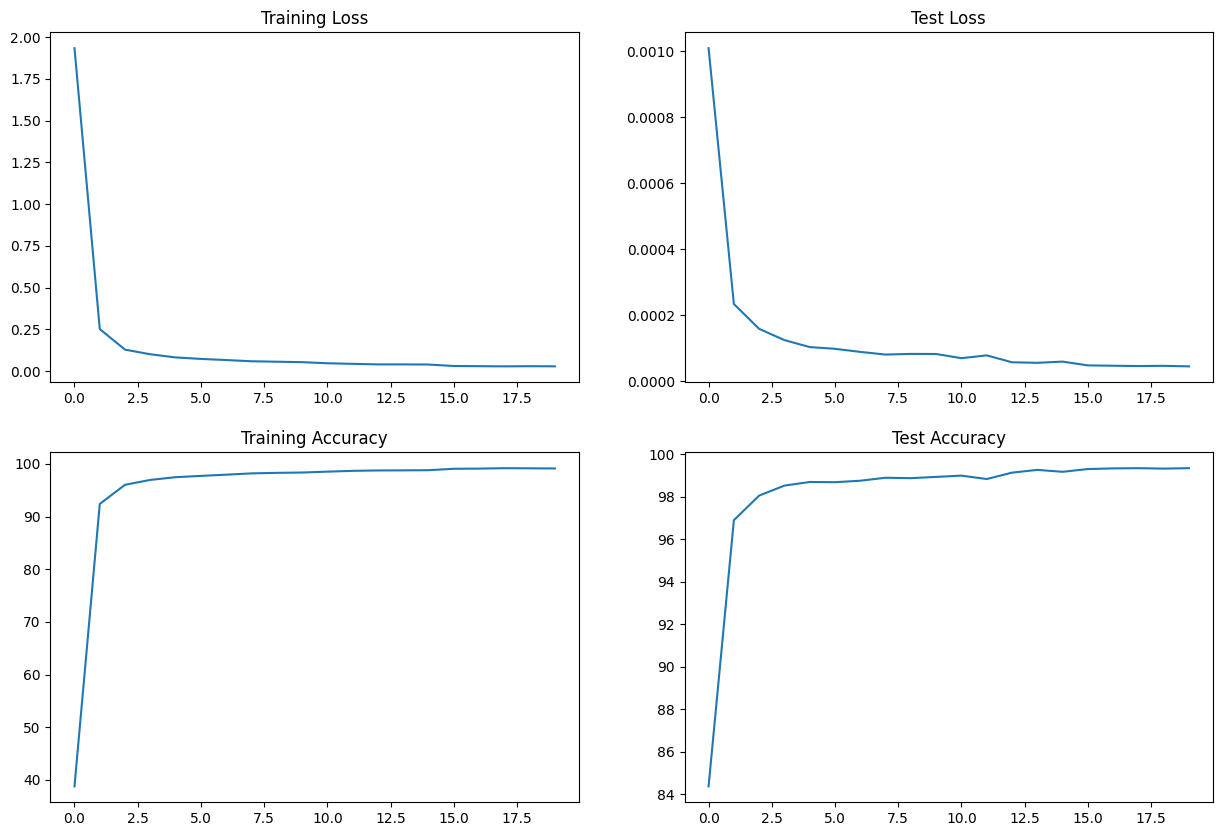

In [9]:
"""CODE BLOCK: 11"""
plot_loss_accuracy(train_losses, test_losses, train_acc, test_acc)

In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
